#**Introduction**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : </b>
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?


---



#**Importing Required Libraries**

In this section, the drive is loaded onto the colab platform and then we import the files onto the colab platform.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
%matplotlib inline
warnings.simplefilter("ignore")


#**Acquaring and Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/capstone project-EDA/Airbnb NYC 2019.csv")

# **Understanding data**

In [ ]:
# Getting an overview of the data
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#checking no of rows to understand the size of given dataset
len(data)

48895

In [ ]:
# Checking the number of rows and columns
data.shape


(48895, 16)

In [ ]:
# Checking the data type of each column
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##Data types and Null values

In [ ]:
# Checking data types and non-null values count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The columns with missing values are **name**, **host_name**, **last_review**, and **reviews_per_month** beacuse these having non-null count less than 48895 (dataframe size).

#**Data Cleaning**

In the data cleaning step, we Load the dataset into a data frame using Pandas functions,Explore the number of rows & columns, ranges of values etc.we then Handle missing, incorrect and invalid data and Perform any additional steps (replace Nan , drop redundundant variables, remove invliad data etc.). the further steps are explained along with the code.

**Removing the Duplicates**

In [ ]:

#checking the Duplicates
data.duplicated().sum()


0

In [ ]:
#Removing the Duplicates if any
data.drop_duplicates(inplace=True)


**Checking the missing values**




After checking the info of the dataset we already were able to see NaN counts in each column, therefore need to examine missing values further before continuing with analysis

In [ ]:
#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
data.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64



*   The columns with missing values are name, host_name, last_review, and reviews_per_month.
*   The last two (last_review,reviews_per_month) are missing over 10,000 rows of data each.
*   The number of reviews per month can be interesting to analyze, so the best way to deal with this column is to replace all NaN values with zeros.
*   As for the other three columns, they will not be used in this analysis and should be dropped.
   
  Therefore, let's proceed with removing columns that are not important and handling of missing data.

**Removing redundant Columns**

In [ ]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
#We are dropping 'host_name' because those names are of actual humans, also they present no security threat or military/governmental interest based on the nature of the dataset, therefore names are unimportant to us.
data.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [ ]:
# Examining Changes
print("updated dataframe shape:", data.shape)
data.head()

updated dataframe shape: (48895, 12)


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


**Dealing with missing values**

In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0
data.fillna({'reviews_per_month':0}, inplace=True)


In [ ]:
#examing changes
data.reviews_per_month.isnull().sum()

0

**Checking the NaN values**

In [ ]:
# Checking the null values
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We have not found any null value in data set. if found remove all row & column having null value.

**Removing the NaN values**

In [ ]:
# Remove the NaN values from the dataset
data.dropna(how='any',inplace=True)


In [ ]:
#for getting a concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

No column has null or NaN values now.

**Checking zeros values**

In [ ]:
(data== 0).sum()


host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

* number_of_reviews and reviews_per_month can be zero, if people did not reviewd.
* price can be also zero for promoting some new airbnb.

* we now look at the availability of the airbnb.There are some airbnb's which are available for 0 days .Although this is allowed the number of reviews on them had a value. which means the airbnb has been reviewed even without somebody staying in there. hence, these values are dropped from the list.

**Dealing with invalid Data**

In [ ]:
#dataframe shape
data.shape

(48895, 12)

In [ ]:
for i in range(len(data)):
 if data.availability_365[i]==0 and data.number_of_reviews[i]!=0:
  data.drop([i], inplace= True)

In [ ]:
#examing changes
data.shape

(36207, 12)

We can see that our dataset rows reduced to 36207 from 48895


# **Exploring and Visualizing Data**

In [ ]:
# Using the describe() function to get various summary statistics, which exclude NaN values.

data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.620700e+04,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000,36207.000000
mean,7.627096e+07,40.728764,-73.950054,161.832491,7.955561,27.590079,1.307588,9.156185,152.303229
std,8.393650e+07,0.055803,0.049606,254.232662,22.787553,49.266153,1.735645,38.042091,131.818455
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.618096e+06,40.689220,-73.983240,70.000000,1.000000,0.000000,0.000000,1.000000,21.000000
50%,3.681609e+07,40.723890,-73.954760,110.000000,3.000000,6.000000,0.610000,1.000000,125.000000
75%,1.316910e+08,40.763180,-73.932070,187.000000,5.000000,32.000000,2.030000,3.000000,283.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


At first glance, the summary statistics shows us that
* the average price is 161.83,
* the average minimum nights stay is 7.95 nights,
* the average number of reviews is 27.59 per listing,
* a host has an average of 9.15 places listed and
* availability averages 152.30 vacant days per year.

Most importantly, the min price is showing as zero and the max price as 10,000. Something isn't right with the data, so need to look into this issue and check for outliers.

In [ ]:
# checking all columns list
data.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

let's proceed with examing some interesting categorical unique values


In [ ]:
#examining the unique values of neighbourhood_group for checking how many neighborhood groups are there?

data['neighbourhood_group'].unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#examining the unique values of neighbourhood for checking how many neighborhoods are there?
print("total no of unique neighbourhood :",len(data.neighbourhood.unique()))
data['neighbourhood'].unique()



total no of unique neighbourhood : 220


array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'Murray Hill',
       "Hell's Kitchen", 'Chinatown', 'Upper West Side', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'East Harlem', 'Park Slope', 'Bedford-Stuyvesant',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Flatlands',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Ridgewood', 'Morningside Heights', 'Jamaica',
       'Middle Village', 'NoHo', 'Ditmars Steinway', 'Cobble Hill',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point',
       'Eastchester', '

In [ ]:
#examining the unique values of room_type for checking how many room types are available for rental?

data['room_type'].unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# How many host listings are there?
data.host_id.nunique()

26388

Initially dataset has 16 columns and 48,895 rows, but a significant number of values seem to be missing from the last_review and reviews_per_month columns. It includes information about the listings, such as id, host name, room type, price, and neighborhood.

After cleaning data set,details are as below

* 5 different type neighborhood groups,
* 221 neighborhoods,
* 26388 unique hosts,
* 3 types of room available for rental.
* 36207 listings, and
* 12 columns

#Question 1:   What can we learn about different hosts and areas?


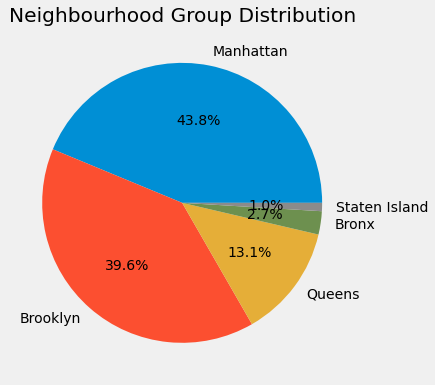

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group Distribution")
neighbourhood_group_count=data.neighbourhood_group.value_counts();
neighbourhood_group_label=data.neighbourhood_group.value_counts().index
pie_chart = plt.pie(neighbourhood_group_count, labels=neighbourhood_group_label,autopct='%1.1f%%', startangle=0)


The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. We also know that from this map of Neighborhood Group.

We can see that Manhattan has the highest number of listings - making up for 43.8% of the total - followed by Brooklyn with 39.6%. The other three groups have significantly less listings: Queens (13.1%), Bronx (2.7%), and Staten Island (1%).

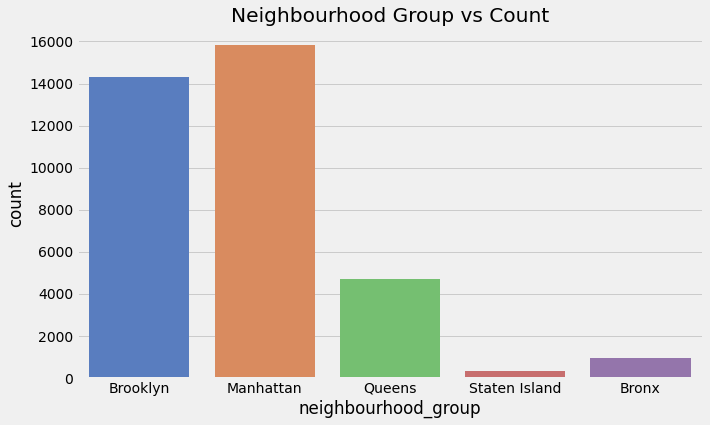

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group vs Count")
sns.countplot(x=data.neighbourhood_group,palette="muted")
plt.ioff()

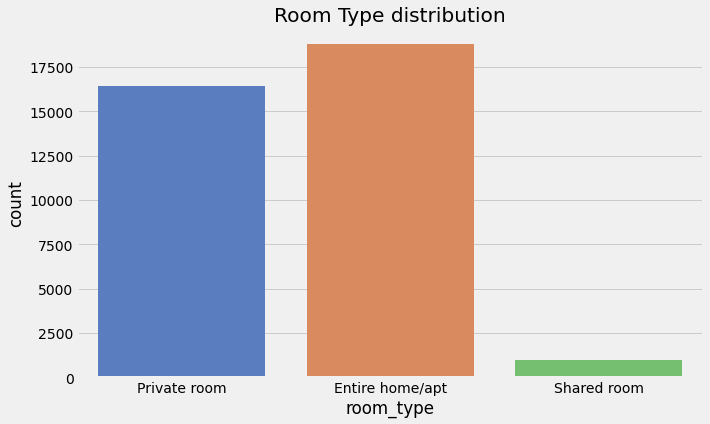

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Room Type distribution")
sns.countplot(x=data.room_type,palette="muted")
plt.ioff()

We can see that the **Entire Home/Apartment has the highest share**, followed by the Private Room, and the least preferred is Shared Room.

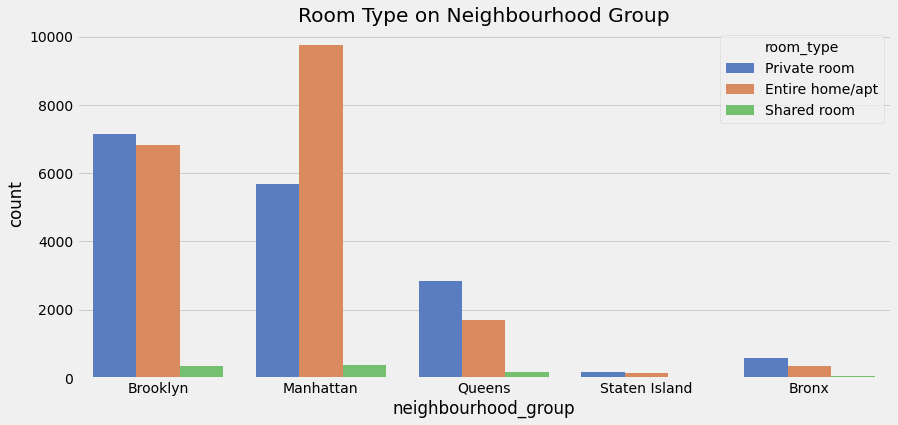

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x=data.neighbourhood_group,hue=data.room_type, palette="muted")
plt.show()


* The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.


* from this plot, we can infer that although the number of airbnbs in Manhattan is more, The number of private airbnbs in Brooklyn is way more than in Manhattan.

* also, the total number of shared rooms are comparetively very less than anyother type

#Queation 2: What can we learn from predictions? (ex: locations, prices, reviews, etc)


**Correlation among the given features**




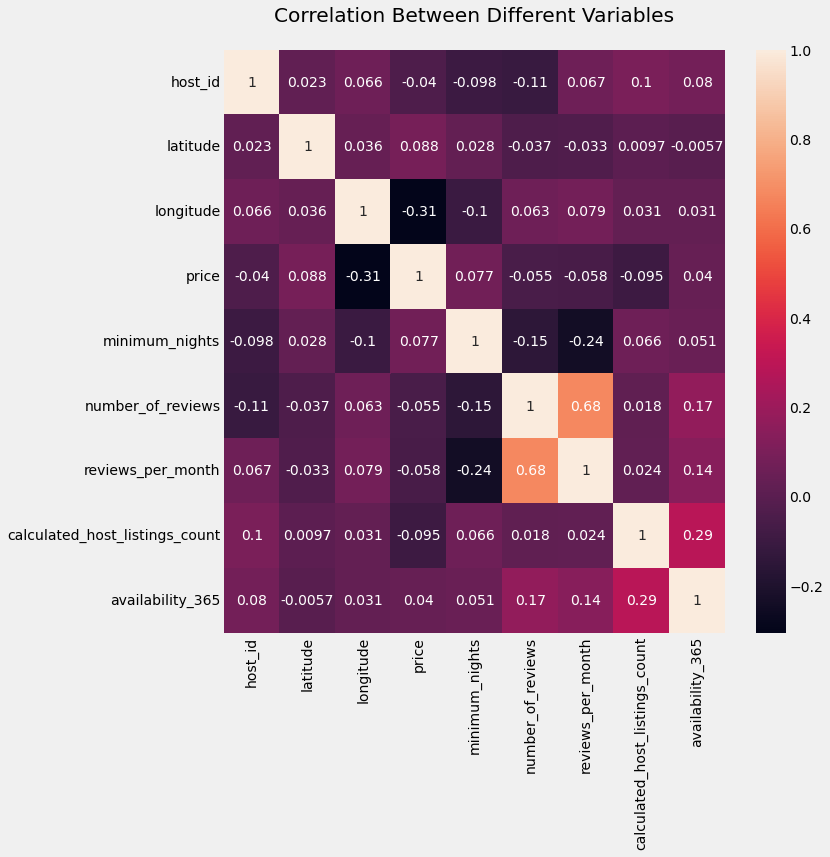

In [ ]:
corr = data.corr(method='kendall')
plt.figure(figsize=(10,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()


From the above graph, we can see that there is not a strong correlation except review_per_month and number_of_review.
We need to try a price prediction using some machine learning model.

# Price Prediction


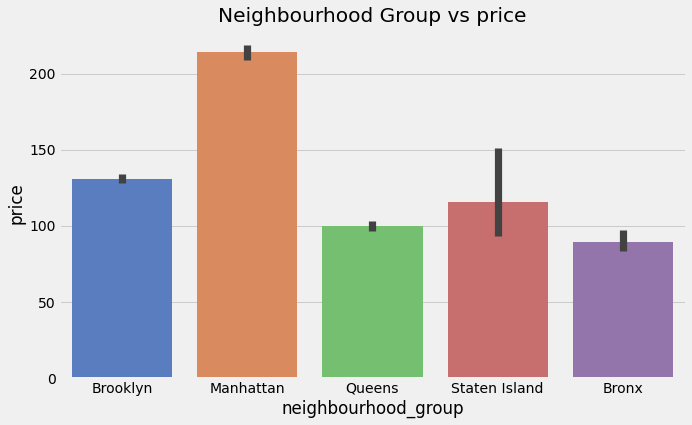

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group vs price")
sns.barplot(x=data.neighbourhood_group, y=data.price,palette="muted")
plt.show()

# Reviews Prediction

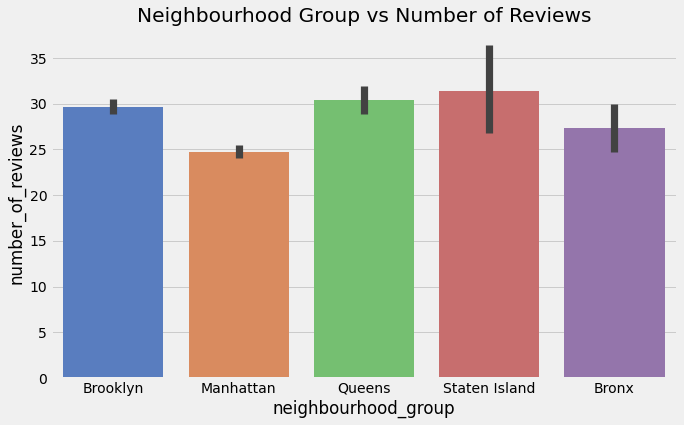

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group vs Number of Reviews")
sns.barplot(x=data.neighbourhood_group, y=data.number_of_reviews,palette="muted")
plt.show()

In [ ]:
#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=data.nlargest(10,'number_of_reviews')
top_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
1271,2680820,Queens,Flushing,40.75578,-73.81948,Private room,55,1,474,5.53,3,332


In [ ]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 64.9


This table format would be the most suitable output for better reading. From this table output, we can observe that top 10 most reviewed listings on Airbnb  
* has price average of $64.9
* with most of the listings under \$50,
*  9/10 of them are 'Private room' type;
*  top reviewed listing has 629 reviews.




# Queation 3: Which hosts are the busiest and why?

In [ ]:
#let's see what hosts (IDs) have the most listings on Airbnb platform dataset
top_host=data.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866     98
12243051      96
16098958      95
61391963      87
22541573      85
200380610     65
1475015       52
Name: host_id, dtype: int64

In [ ]:
top_host_data=pd.DataFrame(top_host)
top_host_data.reset_index(inplace=True)
top_host_data.rename(columns={'index':'host_id', 'host_id':'P_Count'}, inplace=True)
top_host_data

,host_id,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,98
4,12243051,96
5,16098958,95
6,61391963,87
7,22541573,85
8,200380610,65
9,1475015,52


In [ ]:
#in our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check_value=data.calculated_host_listings_count.max()
top_host_check_value

327

[Text(0, 0, '1475015'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

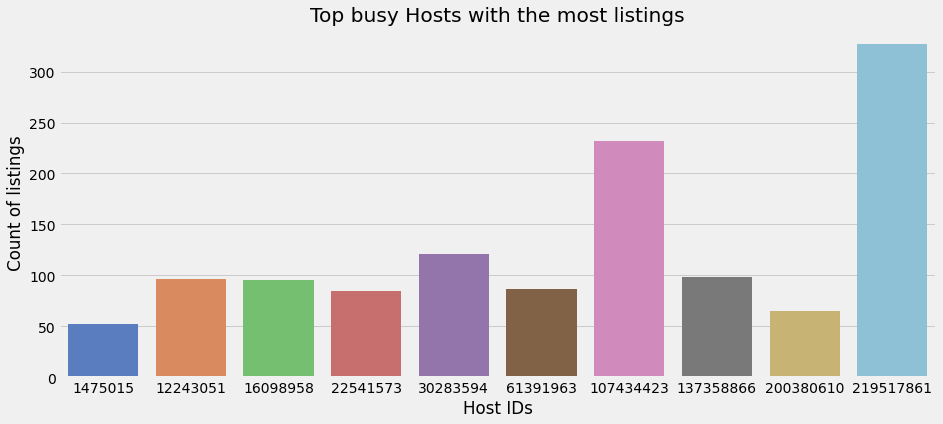

In [ ]:
plt.figure(figsize=(14,6))
viz_1=sns.barplot(x="host_id", y="P_Count", data=top_host_data, palette='muted')
viz_1.set_title('Top busy Hosts with the most listings')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=0)

In [ ]:
# taking intersection of top_host and dataframe df
int_data = pd.merge(top_host_data, data, how ='inner', on =['host_id'])
int_data.head()

,host_id,P_Count,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,219517861,327,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
1,219517861,327,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
2,219517861,327,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
3,219517861,327,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
4,219517861,327,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81


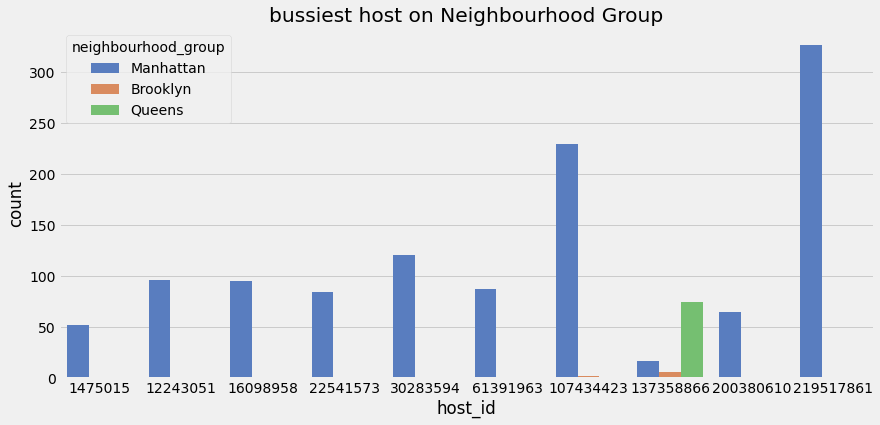

In [ ]:
plt.figure(figsize=(13,6))
plt.title("bussiest host on Neighbourhood Group")
sns.countplot(x=int_data.host_id,hue=int_data.neighbourhood_group, palette="muted")
plt.show()

All bussiest hosts belog to Manhattan group and Manhattan group is already having most no of listing.

# Queation 4: Is there any noticeable difference of traffic among different areas and what could be the reason for it?


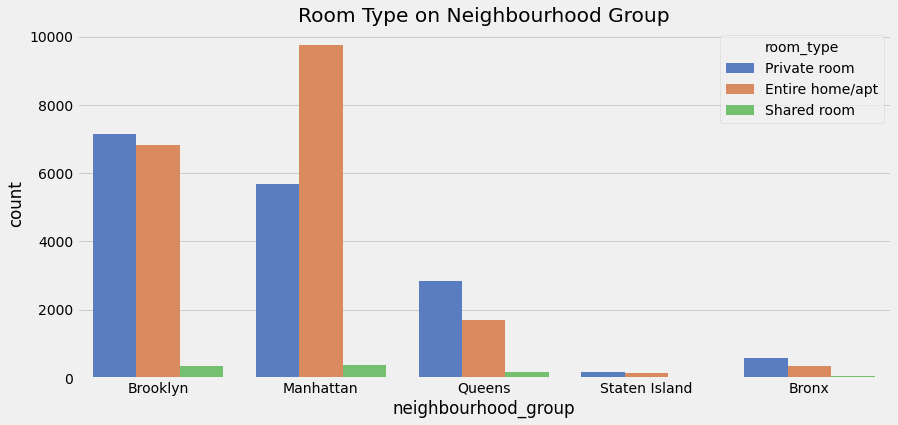

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x=data.neighbourhood_group,hue=data.room_type, palette="muted")
plt.show()

The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

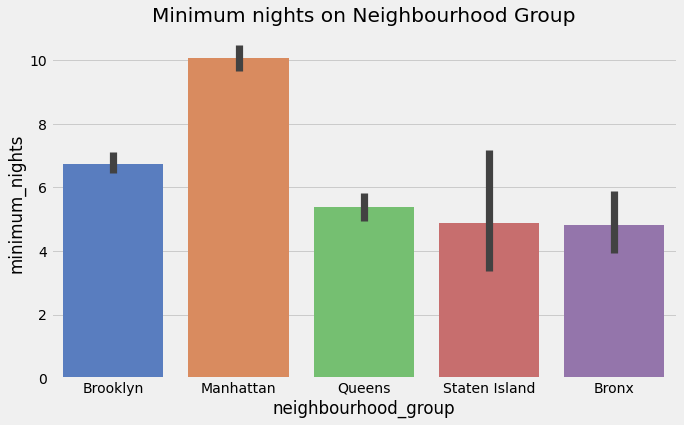

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Minimum nights on Neighbourhood Group")
sns.barplot(x=data.neighbourhood_group, y=data.minimum_nights,palette="muted")
plt.show()

The graph shows that Manhattan has the highest count for minimum_nights.

---



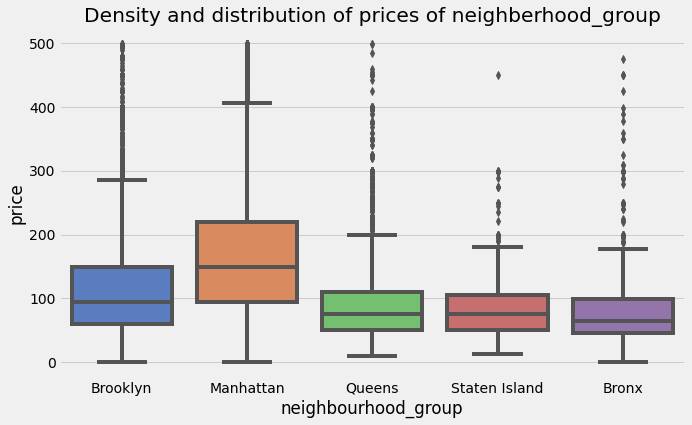

In [ ]:
#creating a sub-dataframe with removing extreme values / less than 500
plt.figure(figsize=(10,6))
plt.title("Density and distribution of prices of neighberhood_group")
subset_data=data[data.price < 500]
#using boxplot to showcase density and distribtuion of prices
viz_2=sns.boxplot(data=subset_data, x='neighbourhood_group', y='price',palette="muted")

With a box plot we can definitely observe a couple of things about distribution and density of prices for Airbnb in NYC Groups. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all.

 This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.


##**Conclusion**

The Manhattan group has the highest no of listing due to some factor.
1. Manhattan has the highest booking of type Entire Home/Apartment.
2. Manhattan has the highest minimum_nights count.
3. Manhattan has a higher range of prices compared to the other.

So people who want to stay long, book **Entire Home/Apartment** and due to higher range of prices, people can get affordable booking with higer standard of living

